In [134]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


In [29]:
#reading data
df=pd.read_excel(r"datasets\RIL Jan 2018 to Jan 2020.xlsx", parse_dates=True, index_col = "Date")

In [30]:
df

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2018-12-31,1127.15,1133.40,1116.60,1121.05,1122.607469,264252,5537,296651269,64647,24.46,16.80,-6.10
2018-12-28,1123.30,1135.90,1122.00,1125.80,1129.832111,343132,7868,387681552,87263,25.43,13.90,2.50
2018-12-27,1105.00,1125.90,1104.45,1120.00,1119.317816,454773,11609,509035521,111874,24.60,21.45,15.00
2018-12-26,1087.00,1100.65,1066.55,1096.95,1081.033616,474923,12592,513407728,84857,17.87,34.10,9.95
2018-12-24,1101.80,1103.00,1086.50,1090.05,1093.660722,270421,6340,295748826,57737,21.35,16.50,-11.75
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-05,920.50,925.85,919.45,923.00,922.699680,406686,3944,375249042,140413,34.53,6.40,2.50
2018-01-04,919.00,921.80,916.00,920.25,918.934284,238922,3185,219553617,111336,46.60,5.80,1.25
2018-01-03,924.45,927.20,913.30,916.35,920.140625,515755,6497,474567128,218031,42.27,13.90,-8.10


# Using data visualization to to find time series component

**Plotting line plot to find time series components like TREND,SEASONALITY,CYCLICITY,NOISE**

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

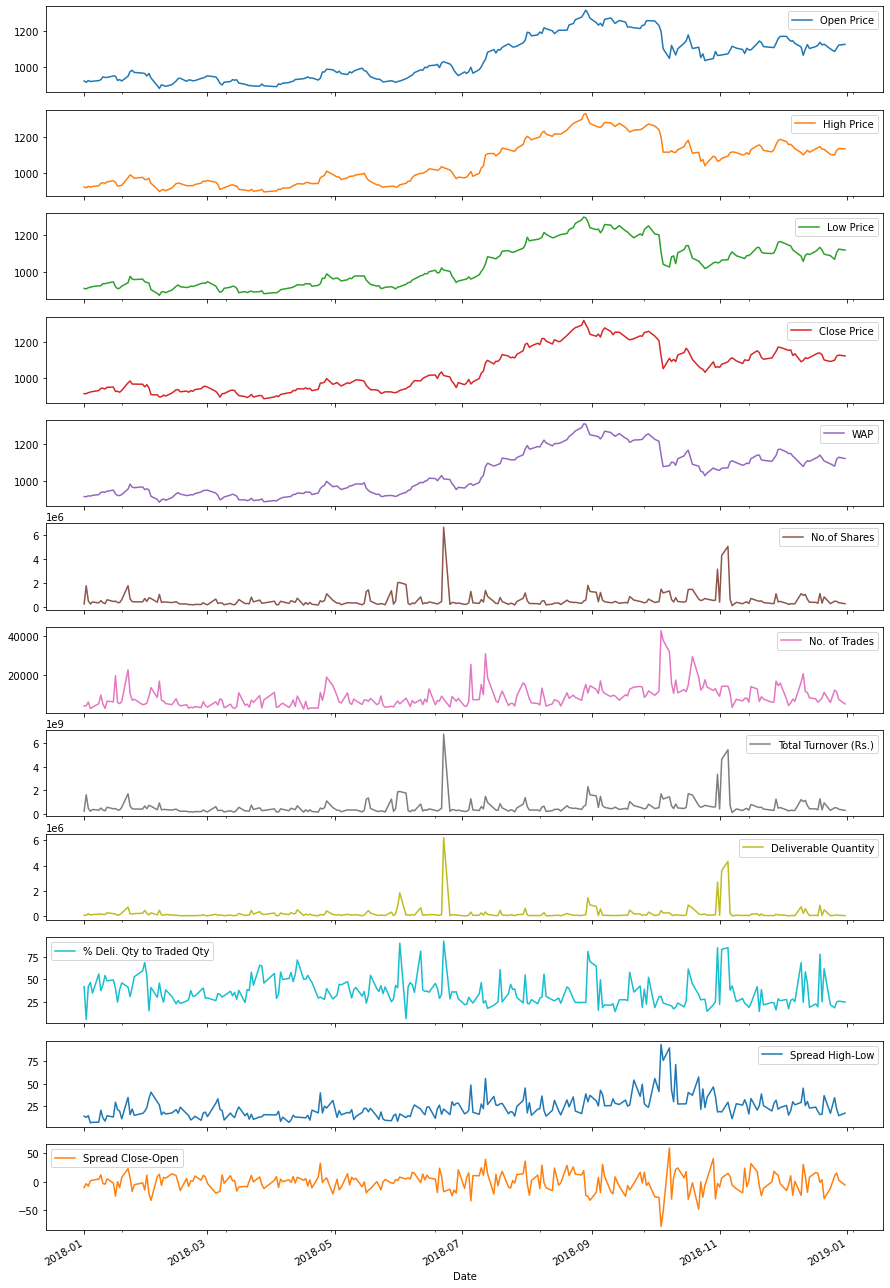

In [31]:
df.plot(subplots=True, figsize=(15,25))

**The shape of the curve for 'Open', 'Close', 'High','Low'and 'WAP' data have the same shape.**

**'No.of Shares','Total Turnover (Rs.)','Deliverable Quantity' also has same shape.**

**'No. of Trades','% Deli. Qty to Traded Qty', 'Spread High-Low','Spread Close-Open' has a different shape.**

**Along with line plot we can use bar plot and box plot to find the seasonality in the data** 

**if for the next year similar pattern is forming for same months then we can that it is following seasonality**

**in this way even visualization can help in forecasting**

In [69]:
# data extraction
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day


In [88]:
df1=df["Open Price"].groupby(by=df['Day']).sum()
df1

Day
1      7278.15
2      6946.15
3      8584.60
4      8289.05
5     10169.60
6      9286.20
7      8435.45
8      6899.85
9      9049.20
10     8539.25
11     8247.90
12    10262.80
13     7346.90
14     8495.40
15     7031.75
16     9254.35
17     8654.75
18     7275.70
19    10393.85
20     8349.60
21     8499.15
22     6956.85
23     8073.60
24     8615.10
25     7259.15
26     9389.70
27     9683.85
28     8542.50
29     6363.75
30     7558.15
31     6485.00
Name: Open Price, dtype: float64

In [98]:
data=pd.read_csv(r"datasets\airline-passengers.csv", parse_dates=True, index_col = "Month")
data.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

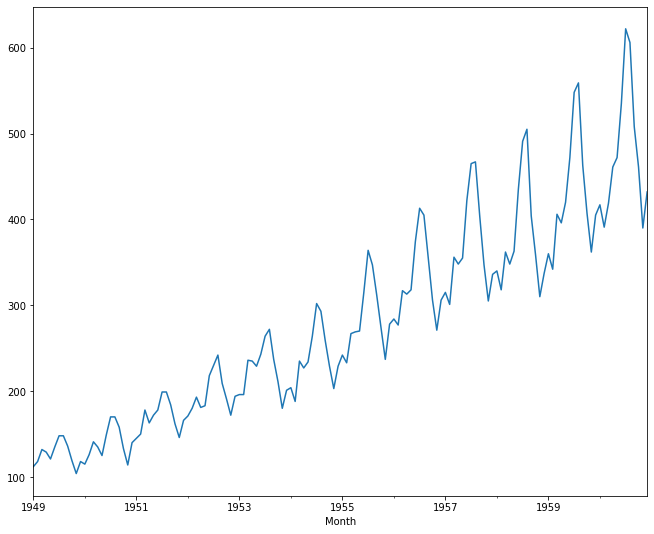

In [100]:
data['Passengers'].plot()

Seasonality can be found in the data

Text(0.5, 0, 'Year')

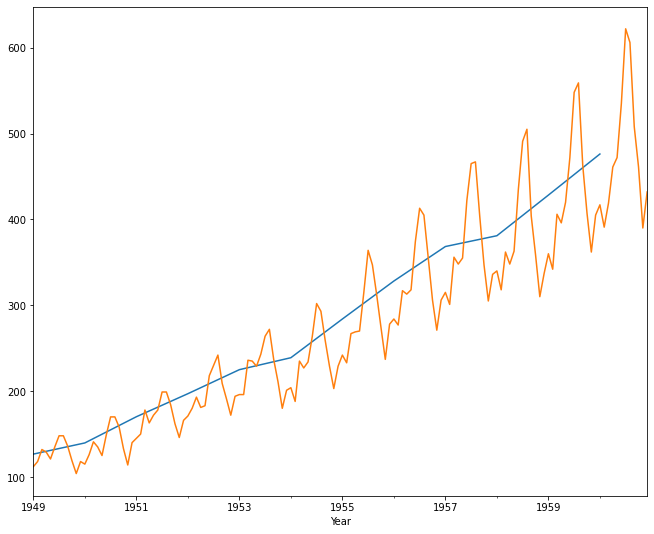

In [128]:
data["Passengers"].resample("Y").mean().plot()
data['Passengers'].plot()
plt.xlabel("Year")


Positive trend can be depicted as an observation from the plot

# Decomposition of time series data

**Additive decomposition**

level+trend+seasonality=Error

In [129]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

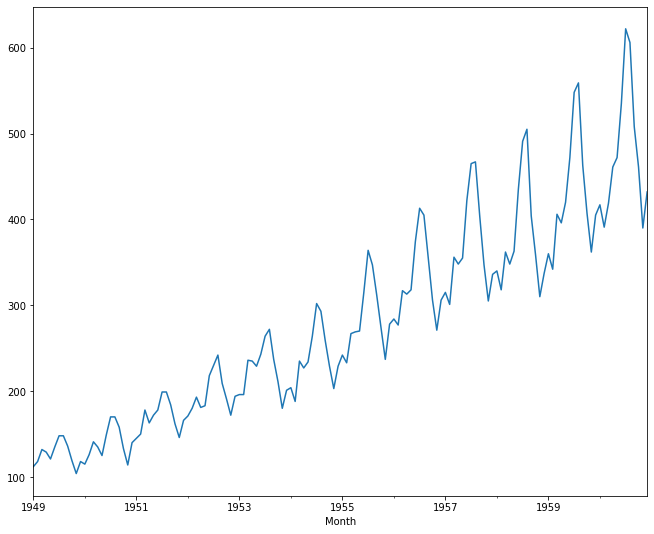

In [131]:
data.Passengers.plot()

**We can observe trend ,seasonity in the data lets seperate(decompose) them to see impact of all** 

In [138]:
#Additive Decomposition
add_result=seasonal_decompose(data['Passengers'],model='additive' ,period=1)

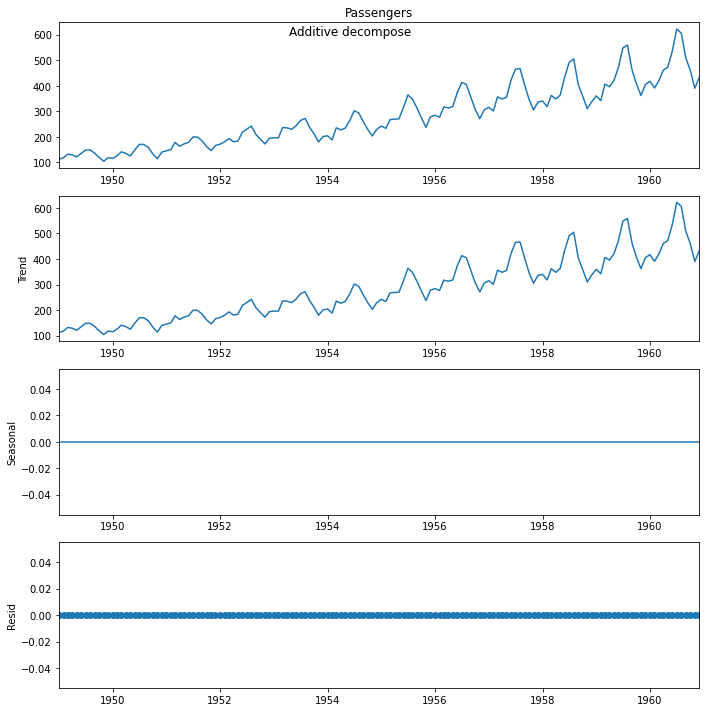

In [154]:
#plotting
plt.rcParams.update({'figure.figsize':(10,10)})
add_result.plot().suptitle("\nAdditive decompose",fontsize=12)


**The following plot show decompose form of time series data**

In [147]:
new_df_add=pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)
new_df_add.columns =['seasonality','Trend','residual','actual value']
new_df_add

,seasonality,Trend,residual,actual value
Month,,,,
1949-01-01,0.0,112.0,0.0,112.0
1949-02-01,0.0,118.0,0.0,118.0
1949-03-01,0.0,132.0,0.0,132.0
1949-04-01,0.0,129.0,0.0,129.0
1949-05-01,0.0,121.0,0.0,121.0
...,...,...,...,...
1960-08-01,0.0,606.0,0.0,606.0
1960-09-01,0.0,508.0,0.0,508.0
1960-10-01,0.0,461.0,0.0,461.0


In [136]:
#Multiplicative Decomposition
mul_result=seasonal_decompose(data['Passengers'],model='multiplicative' ,period=1)

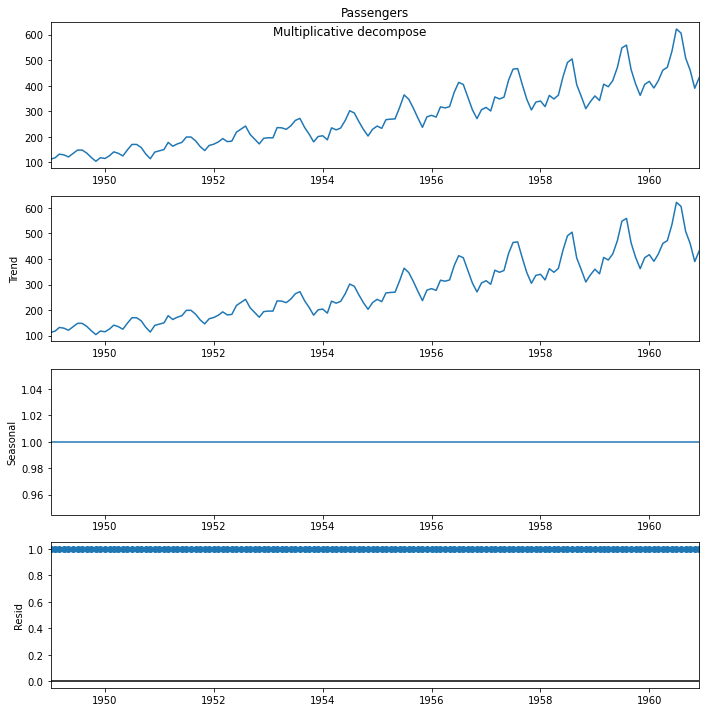

In [155]:
#plotting
plt.rcParams.update({'figure.figsize':(10,10)})
mul_result.plot().suptitle("\nMultiplicative decompose",fontsize=12)

**The following plot show decompose form of time series data**

In [148]:
new_df_mul=pd.concat([mul_result.seasonal,mul_result.trend,mul_result.resid,mul_result.observed],axis=1)
new_df_mul.columns =['seasonality','Trend','residual','actual value']
new_df_mul

,seasonality,Trend,residual,actual value
Month,,,,
1949-01-01,1.0,112.0,1.0,112.0
1949-02-01,1.0,118.0,1.0,118.0
1949-03-01,1.0,132.0,1.0,132.0
1949-04-01,1.0,129.0,1.0,129.0
1949-05-01,1.0,121.0,1.0,121.0
...,...,...,...,...
1960-08-01,1.0,606.0,1.0,606.0
1960-09-01,1.0,508.0,1.0,508.0
1960-10-01,1.0,461.0,1.0,461.0


## Checking for stationarity of time series data

**If the graph of rolling mean and rolling standard deviation is not constant then  data is not stationary**

**If tthe graph of rolling mean and rolling standard deviation is  constant then  data is  stationary**

**Checking if the air line passenger data is stationary or not**

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64 Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: Passengers, Length: 144, dtype: float64


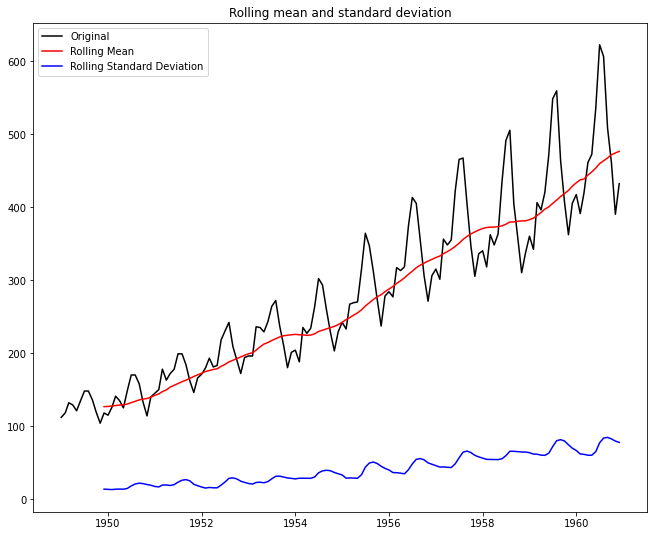

In [118]:
rmean=data['Passengers'].rolling(window=12).mean()
rstd=data['Passengers'].rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(data['Passengers'] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

**Since the graph of rolling mean and rolling standard deviation is not constant then  data is not stationary**

In [158]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(data['Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


**Checking if in stock data variable "No.of Shares" is stationary or not**

**Since the graph of rolling mean and rolling standard deviation is  constant then  data is  stationary**

**To make conclusive evidece we will perform Dickey-fuller test**

H0(null hypothesis) data is not staionary

H1(alternate hypothesis) data is stationary 

In [124]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df['No.of Shares'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -1.226035e+01
p-value                        9.109120e-23
#lags used                     0.000000e+00
number of observations used    2.450000e+02
critical value (1%)           -3.457326e+00
critical value (5%)           -2.873410e+00
critical value (10%)          -2.573096e+00
dtype: float64


**Since p value is low than 0.05 we reject hull hypothesis**